# Importing all the libraries 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
(X_train_full, Y_train_full), (X_test, Y_test) = mnist.load_data()

## Extracting Data Features 

In [3]:
print("Training images :",X_train_full.shape)
print("class names for training images :",Y_train_full.shape)
print("Test images :",X_test.shape)
print("class names for testing images :",Y_test.shape)
print("data type for training images :",X_train_full.dtype)

Training images : (60000, 28, 28)
class names for training images : (60000,)
Test images : (10000, 28, 28)
class names for testing images : (10000,)
data type for training images : uint8


In [4]:
print(X_train_full[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Lables For the images 

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
print(class_names[-1])

9


In [6]:
print("class number example :",Y_train_full[0])
print("class name example :",class_names[Y_train_full[0]])

class number example : 5
class name example : 5


## Example of an image from the Data Set 

class number example : 4
class name example : 4
0


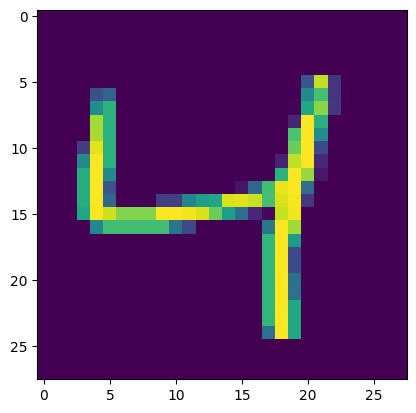

In [7]:
print("class number example :",Y_train_full[2])
print("class name example :",class_names[Y_train_full[2]])
print(X_train_full[2][20][20])
plt.imshow(X_train_full[2])

# Standardisation of the images 

In [8]:
print("max:",X_train_full[0].max())
print("min:",X_train_full[0].min())

max: 255
min: 0


In [9]:
x_valid,x_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid,y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test / 255.0

In [10]:
print("max:",x_train[0].max())
print("min:",x_train[0].min())

max: 0.996078431372549
min: 0.0


In [11]:
print("training dataset:",x_train.shape)
print("validating dataset:",x_valid.shape)
print("Testing Dataset:",X_test.shape)

training dataset: (55000, 28, 28)
validating dataset: (5000, 28, 28)
Testing Dataset: (10000, 28, 28)


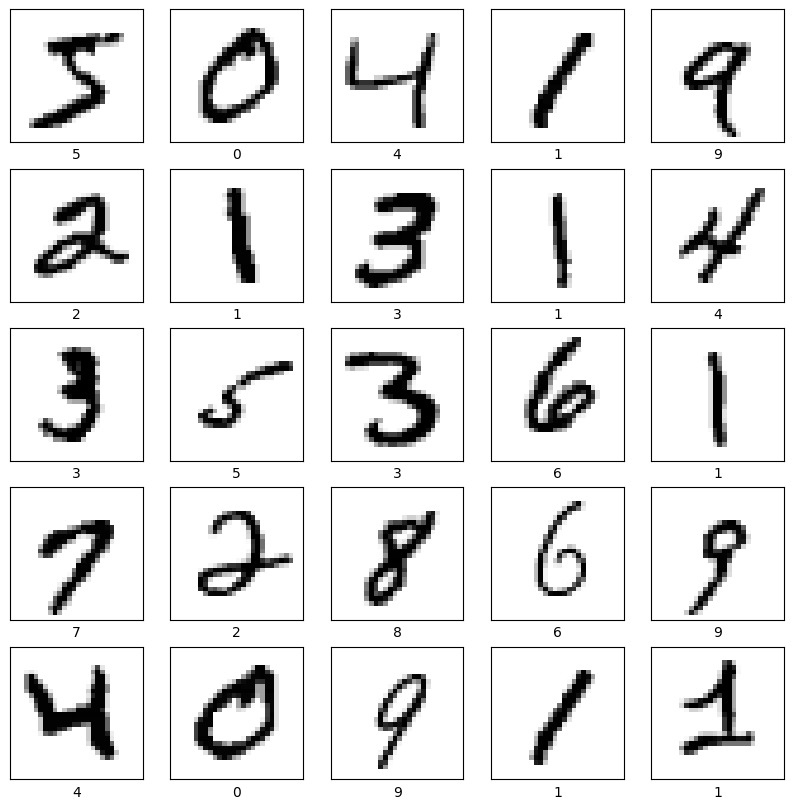

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train_full[i]])
plt.show()

# Building model 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),# Input layer, assuming images are 28x28 pixels
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),# Hidden layer with 128 neurons and ReLU activation 
    tf.keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')# Output layer with 10 neurons (assuming 10 classes) and softmax activation
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                2

# Training and testing the model 

In [16]:
model.compile(optimizer='sgd',  # Optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for classification
              metrics=['accuracy'])  # Evaluation metric(s)

In [17]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4328 - accuracy: 0.8721 - val_loss: 0.2216 - val_accuracy: 0.9344
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2233 - accuracy: 0.9341 - val_loss: 0.1715 - val_accuracy: 0.9486
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9491 - val_loss: 0.1494 - val_accuracy: 0.9554
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1442 - accuracy: 0.9569 - val_loss: 0.1316 - val_accuracy: 0.9610
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1253 - accuracy: 0.9627 - val_loss: 0.1246 - val_accuracy: 0.9630
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1100 - accuracy: 0.9679 - val_loss: 0.1188 - val_accuracy: 0.9634
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9704 - val_loss: 0.1153 - val_accuracy:

In [18]:
print("Training Loss ",history.history['loss'][-1])
print("Training Accuracy ",history.history['accuracy'][-1])
print("Validation Loss ",history.history['val_loss'][-1])
print("Validation Accuracy ",history.history['val_accuracy'][-1])

Training Loss  0.07371310889720917
Training Accuracy  0.9771999716758728
Validation Loss  0.10486762970685959
Validation Accuracy  0.9697999954223633


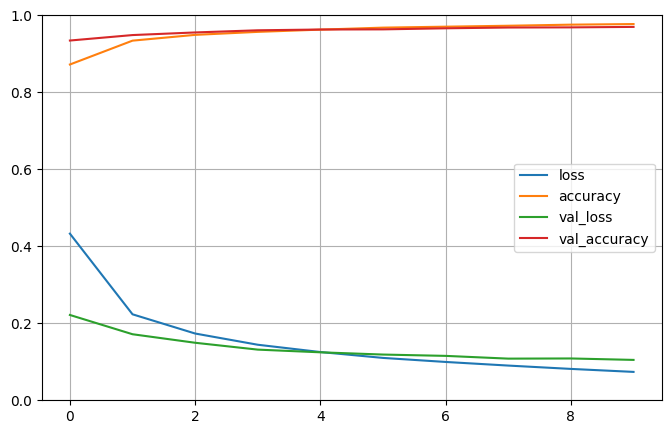

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
test_loss,test_acc = model.evaluate(X_test,Y_test)
print('\n Test accuracy:',test_acc)
print('\n Test test_loss:',test_loss)

313/313 [==============================] - 0s 939us/step - loss: 0.1048 - accuracy: 0.9688

 Test accuracy: 0.9688000082969666

 Test test_loss: 0.10483040660619736


# Using the model for prediction 

In [21]:
probability = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [22]:
prediction = probability.predict(X_test)
print(prediction.shape)

313/313 [==============================] - 0s 960us/step
(10000, 10)


In [23]:
values=np.array([1,2,3,4,5,65,3,4,5,6,200,2])
np.argmax(values)

10

In [24]:
prediction[0]
print(prediction[0])
np.argmax(prediction[0])

[0.08535028 0.08534683 0.08537198 0.08536254 0.08534925 0.0853506
 0.08534639 0.23181859 0.08534681 0.08535676]


7

In [25]:
class_names[Y_test[0]]

'7'

In [26]:
class_names[Y_test[0]]

'7'

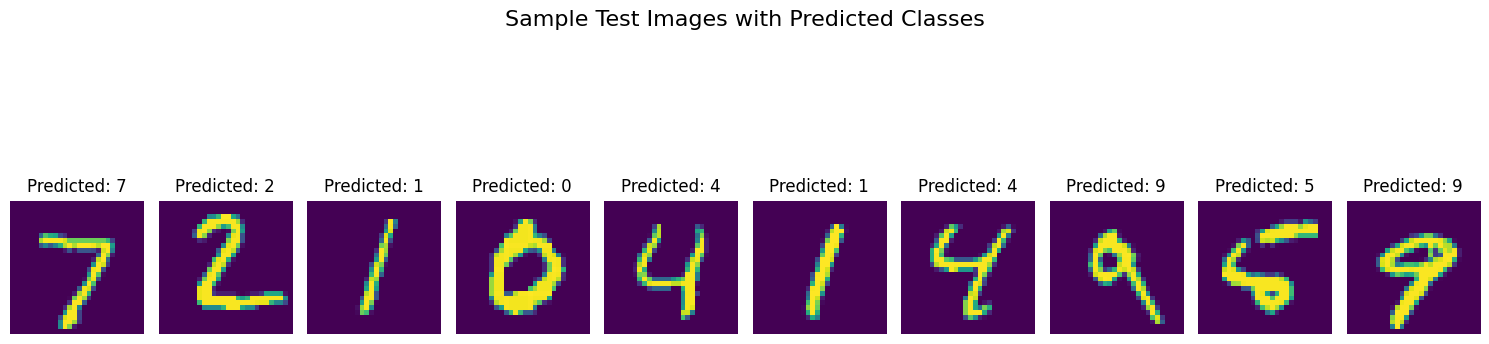

In [27]:
# Display a few test images along with their predicted classes
num_images_to_display = 10

plt.figure(figsize=(15, 5))
plt.suptitle('Sample Test Images with Predicted Classes', fontsize=16)

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='viridis')
    plt.title(f'Predicted: {class_names[Y_test[i]]}')
    plt.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()